<a href="https://colab.research.google.com/github/kathy5311/Gentrification_Prediction/blob/main/2019_2023_%EC%9E%90%EC%B9%98%EA%B5%AC%EB%B3%84_%EC%B6%94%EC%A0%95%EB%A7%A4%EC%B6%9C_revise_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sale_df = pd.read_csv('서울시 상권분석서비스(추정매출-자치구) (1).csv', encoding = 'CP949')

In [3]:
sale_df.head(3)

,기준_년분기_코드,자치구_코드,자치구_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20191,11110,종로구,CS300028,화초,1495850124,36765,1314004524,181845600,171773552,...,14178,882,14947,17876,345,10672,9937,6291,4030,1542
1,20191,11110,종로구,CS100004,양식음식점,21733503173,586239,15141392928,6592110245,2473306312,...,210914,51176,244199,295978,6781,212438,144750,90539,62719,22943
2,20191,11110,종로구,CS100007,치킨전문점,3247811505,111086,2414124197,833687308,387818146,...,40712,38887,60952,43654,2077,34735,25143,20359,16465,5826


In [4]:
# 사용할 컬럼

sale_df = sale_df[['기준_년분기_코드', '자치구_코드_명', '서비스_업종_코드_명', '연령대_10_매출_금액', '연령대_20_매출_금액',
                  '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']]

sale_df.head(3)

,기준_년분기_코드,자치구_코드_명,서비스_업종_코드_명,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액
0,20191,종로구,화초,4821242,236327182,286985195,225269811,249285099,77648643
1,20191,종로구,양식음식점,136382198,6196833737,4967963671,3236855795,2407946855,1049872442
2,20191,종로구,치킨전문점,40820693,927312845,698362320,599689873,471883377,161088031


In [5]:
sale_df.rename(columns={'기준_년분기_코드':'기준년분기코드', '자치구_코드_명':'자치구코드명', '서비스_업종_코드_명':'서비스업종코드명',
                                '연령대_10_매출_금액':'연령대10매출금액', '연령대_20_매출_금액':'연령대20매출금액',
                                '연령대_30_매출_금액':'연령대30매출금액', '연령대_40_매출_금액':'연령대40매출금액', '연령대_50_매출_금액':'연령대50매출금액',
                                '연령대_60_이상_매출_금액':'연령대60이상매출금액'}, inplace=True)

In [6]:
# 기준년분기_코드 - 2019, 2023년만

sale_df['기준년분기코드'].value_counts()

20232    1547
20221    1546
20202    1546
20224    1545
20203    1544
20213    1544
20212    1544
20231    1543
20222    1543
20204    1543
20223    1542
20214    1541
20211    1541
20233    1541
20194    1540
20193    1540
20201    1539
20192    1539
20191    1536
Name: 기준년분기코드, dtype: int64

In [7]:
sale_df['기준년분기코드'] = [str(y)[:4] for y in sale_df['기준년분기코드']]

In [8]:
sale_df_19 = sale_df[sale_df['기준년분기코드'] == '2019']
sale_df_19

,기준년분기코드,자치구코드명,서비스업종코드명,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액
0,2019,종로구,화초,4821242,236327182,286985195,225269811,249285099,77648643
1,2019,종로구,양식음식점,136382198,6196833737,4967963671,3236855795,2407946855,1049872442
2,2019,종로구,치킨전문점,40820693,927312845,698362320,599689873,471883377,161088031
3,2019,종로구,시계및귀금속,181127570,13803201987,26143750620,26406134053,44761390011,24875573557
4,2019,종로구,일반의원,69495695,1814359964,3318178411,3170413889,3463830467,3112932953
...,...,...,...,...,...,...,...,...,...
18751,2019,강동구,문구,118562444,428652977,785285315,1846713724,1090943156,668948615
18752,2019,강동구,반찬가게,10822411,200707119,411861825,3613357988,1403062322,2656187319
18753,2019,강동구,일반의류,160332201,2950343934,5878565968,13127077129,11006128992,7325984742
18754,2019,강동구,양식음식점,285560838,2606988457,1873314388,1922880463,1069897634,403327911


In [9]:
sale_df_23 = sale_df[sale_df['기준년분기코드'] == '2023']
sale_df_23

,기준년분기코드,자치구코드명,서비스업종코드명,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액
7778,2023,동작구,스포츠클럽,45969055,705981575,558755467,198322096,299406486,118999655
7779,2023,강남구,인테리어,0,53957143,179882969,220381752,412921473,462632092
7780,2023,마포구,일식음식점,426885547,9765133164,7991948083,3312422583,2659708473,1057673720
7781,2023,강서구,편의점,694568346,14061657816,26001162136,18149623114,11691971693,6341042894
7782,2023,종로구,핸드폰,5176148,102942139,496139700,179584803,554793412,660458952
...,...,...,...,...,...,...,...,...,...
29299,2023,강동구,고시원,2082227,8956804,150556508,80669723,95255752,109308645
29300,2023,강동구,미곡판매,0,116432372,383067084,184225952,901878596,1311067683
29301,2023,강동구,가구,0,46159608,48531968,30728917,63003449,86341351
29302,2023,강동구,가전제품,0,230185542,3118643144,2557399514,1731175535,1327520699


In [10]:
#점포-자치구 프랜차이즈 비율 0.4 이상 기준으로 데이터 편집

food = ['패스트푸드점', '제과점', '치킨전문점', '커피-음료']

sale_df_19_fm = sale_df_19[sale_df_19['서비스업종코드명'].isin(food)]
sale_df_19_fm['서비스업종코드명'].unique()

array(['치킨전문점', '패스트푸드점', '커피-음료', '제과점'], dtype=object)

In [11]:
sale_df_19_fm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 2 to 18744
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준년분기코드      400 non-null    object
 1   자치구코드명       400 non-null    object
 2   서비스업종코드명     400 non-null    object
 3   연령대10매출금액    400 non-null    int64 
 4   연령대20매출금액    400 non-null    int64 
 5   연령대30매출금액    400 non-null    int64 
 6   연령대40매출금액    400 non-null    int64 
 7   연령대50매출금액    400 non-null    int64 
 8   연령대60이상매출금액  400 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 31.2+ KB


In [12]:
sale_df_23_fm = sale_df_23[sale_df_23['서비스업종코드명'].isin(food)]
sale_df_23_fm['서비스업종코드명'].unique()

array(['제과점', '패스트푸드점', '커피-음료', '치킨전문점'], dtype=object)

In [13]:
sale_df_23_fm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 7786 to 29269
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   기준년분기코드      300 non-null    object
 1   자치구코드명       300 non-null    object
 2   서비스업종코드명     300 non-null    object
 3   연령대10매출금액    300 non-null    int64 
 4   연령대20매출금액    300 non-null    int64 
 5   연령대30매출금액    300 non-null    int64 
 6   연령대40매출금액    300 non-null    int64 
 7   연령대50매출금액    300 non-null    int64 
 8   연령대60이상매출금액  300 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 23.4+ KB


#2019data

In [14]:
sale_df_19_fm['40대이하매출'] = sale_df_19_fm['연령대10매출금액'] + sale_df_19_fm['연령대20매출금액'] + sale_df_19_fm['연령대30매출금액'] + sale_df_19_fm['연령대40매출금액']

<ipython-input-14-5282bb60b0cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_19_fm['40대이하매출'] = sale_df_19_fm['연령대10매출금액'] + sale_df_19_fm['연령대20매출금액'] + sale_df_19_fm['연령대30매출금액'] + sale_df_19_fm['연령대40매출금액']


In [15]:
sale_df_19_fm['전연령매출금액'] = sale_df_19_fm['연령대10매출금액'] + sale_df_19_fm['연령대20매출금액'] + sale_df_19_fm['연령대30매출금액'] + sale_df_19_fm['연령대40매출금액'] + sale_df_19_fm['연령대50매출금액'] + sale_df_19_fm['연령대60이상매출금액']

<ipython-input-15-90a17119103e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_19_fm['전연령매출금액'] = sale_df_19_fm['연령대10매출금액'] + sale_df_19_fm['연령대20매출금액'] + sale_df_19_fm['연령대30매출금액'] + sale_df_19_fm['연령대40매출금액'] + sale_df_19_fm['연령대50매출금액'] + sale_df_19_fm['연령대60이상매출금액']


In [16]:
sale_df_19_fm['전연령대비40대이하매출비율'] = sale_df_19_fm['40대이하매출']/sale_df_19_fm['전연령매출금액']
sale_df_19_fm

<ipython-input-16-a88a1e8379cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_19_fm['전연령대비40대이하매출비율'] = sale_df_19_fm['40대이하매출']/sale_df_19_fm['전연령매출금액']


,기준년분기코드,자치구코드명,서비스업종코드명,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,40대이하매출,전연령매출금액,전연령대비40대이하매출비율
2,2019,종로구,치킨전문점,40820693,927312845,698362320,599689873,471883377,161088031,2266185731,2899157139,0.781671
13,2019,중구,치킨전문점,20577771,563320319,608073771,555146650,419589604,135615039,1747118511,2302323154,0.758850
17,2019,중구,패스트푸드점,71493191,1733284584,1452906110,879053376,487472218,198016843,4136737261,4822226322,0.857848
50,2019,중랑구,패스트푸드점,113490447,1719079496,1869250049,1287287189,1100077075,432148898,4989107181,6521333154,0.765044
93,2019,서대문구,치킨전문점,40195570,754035420,362125498,381032959,305959559,104282796,1537389447,1947631802,0.789363
...,...,...,...,...,...,...,...,...,...,...,...,...
18675,2019,양천구,커피-음료,192426336,1729692539,1464149566,1514815341,935910449,291529053,4901083782,6128523284,0.799717
18706,2019,동작구,치킨전문점,111398852,1387678058,838564730,1023892113,870408015,294173986,3361533753,4526115754,0.742697
18721,2019,서초구,커피-음료,413511667,9335922615,9913731589,7461913896,4592978384,2253528813,27125079767,33971586964,0.798464
18734,2019,강남구,제과점,183910396,3552257897,4405550642,4781286668,3414791192,1907549473,12923005603,18245346268,0.708291


In [17]:
group_df_19=sale_df_19_fm.groupby('자치구코드명').mean()
sorted_df_19 = group_df_19.sort_values(by='전연령대비40대이하매출비율', ascending=False)
sorted_df_19

<ipython-input-17-c0addb364a66>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df_19=sale_df_19_fm.groupby('자치구코드명').mean()


,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,40대이하매출,전연령매출금액,전연령대비40대이하매출비율
자치구코드명,,,,,,,,,
마포구,2.945800e+08,5.170588e+09,3.541480e+09,2.383753e+09,1.410642e+09,4.889859e+08,1.139040e+10,1.329003e+10,0.831606
관악구,1.106761e+08,2.509235e+09,1.682013e+09,1.231174e+09,9.057714e+08,3.822419e+08,5.533098e+09,6.821111e+09,0.806404
광진구,1.723938e+08,2.780111e+09,1.557978e+09,1.207382e+09,9.058812e+08,3.346244e+08,5.717865e+09,6.958370e+09,0.805775
영등포구,1.371644e+08,3.374310e+09,3.462749e+09,2.556271e+09,1.539377e+09,6.375982e+08,9.530494e+09,1.170747e+10,0.800397
성동구,1.081623e+08,1.877759e+09,1.230415e+09,9.734601e+08,6.655665e+08,2.520378e+08,4.189796e+09,5.107400e+09,0.800068
서대문구,1.559692e+08,2.216813e+09,1.067092e+09,1.003566e+09,7.373147e+08,2.578912e+08,4.443440e+09,5.438646e+09,0.795896
종로구,2.619933e+08,4.283505e+09,3.687855e+09,2.775452e+09,1.886813e+09,8.765155e+08,1.100881e+10,1.377213e+10,0.794118
용산구,9.017184e+07,2.026542e+09,1.719304e+09,1.198918e+09,7.910519e+08,3.381898e+08,5.034935e+09,6.164177e+09,0.791931
중구,1.165981e+08,3.212372e+09,3.569053e+09,2.899197e+09,1.788514e+09,8.121472e+08,9.797220e+09,1.239788e+10,0.789123


In [18]:
op_19_df = sorted_df_19.drop(['연령대10매출금액', '연령대20매출금액','연령대30매출금액','연령대40매출금액','연령대50매출금액','연령대60이상매출금액','40대이하매출','전연령매출금액'], axis=1)
op_19_df

,전연령대비40대이하매출비율
자치구코드명,
마포구,0.831606
관악구,0.806404
광진구,0.805775
영등포구,0.800397
성동구,0.800068
서대문구,0.795896
종로구,0.794118
용산구,0.791931
중구,0.789123


#2023data

In [19]:
sale_df_23_fm['40대이하매출'] = sale_df_23_fm['연령대10매출금액'] + sale_df_23_fm['연령대20매출금액'] + sale_df_23_fm['연령대30매출금액'] + sale_df_23_fm['연령대40매출금액']

<ipython-input-19-0036c614b835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_23_fm['40대이하매출'] = sale_df_23_fm['연령대10매출금액'] + sale_df_23_fm['연령대20매출금액'] + sale_df_23_fm['연령대30매출금액'] + sale_df_23_fm['연령대40매출금액']


In [20]:
sale_df_23_fm['전연령매출금액'] = sale_df_23_fm['연령대10매출금액'] + sale_df_23_fm['연령대20매출금액'] + sale_df_23_fm['연령대30매출금액'] + sale_df_23_fm['연령대40매출금액'] + sale_df_23_fm['연령대50매출금액'] + sale_df_23_fm['연령대60이상매출금액']

<ipython-input-20-e72a2c522a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_23_fm['전연령매출금액'] = sale_df_23_fm['연령대10매출금액'] + sale_df_23_fm['연령대20매출금액'] + sale_df_23_fm['연령대30매출금액'] + sale_df_23_fm['연령대40매출금액'] + sale_df_23_fm['연령대50매출금액'] + sale_df_23_fm['연령대60이상매출금액']


In [21]:
sale_df_23_fm['전연령대비40대이하매출비율'] = sale_df_23_fm['40대이하매출']/sale_df_23_fm['전연령매출금액']
sale_df_23_fm

<ipython-input-21-0550e28c2ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df_23_fm['전연령대비40대이하매출비율'] = sale_df_23_fm['40대이하매출']/sale_df_23_fm['전연령매출금액']


,기준년분기코드,자치구코드명,서비스업종코드명,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,40대이하매출,전연령매출금액,전연령대비40대이하매출비율
7786,2023,동대문구,제과점,69166232,1284320481,1455977229,1659147261,1590862305,1069351261,4468611203,7128824769,0.626837
7849,2023,강남구,제과점,158140237,3116243322,5098147902,5080893791,3921417341,2991000248,13453425252,20365842841,0.660588
7855,2023,강남구,패스트푸드점,379674298,3874133781,4868164939,3884908577,2793789985,1199269946,13006881595,16999941526,0.765113
7859,2023,금천구,제과점,31216365,615942640,1101913315,1064366295,1062320641,793308784,2813438615,4669068040,0.602570
7869,2023,광진구,커피-음료,305279086,5656664575,4406357487,2712754661,2520237110,1262554688,13081055809,16863847607,0.775686
...,...,...,...,...,...,...,...,...,...,...,...,...
29230,2023,구로구,제과점,59085793,993336618,1740859876,1846104926,1598350865,1284875057,4639387213,7522613135,0.616725
29246,2023,영등포구,제과점,47172088,1391100669,2808459481,2945245610,2034134131,1458738178,7191977848,10684850157,0.673100
29251,2023,동작구,치킨전문점,36800462,758050674,813227966,936081364,1108407309,667144304,2544160466,4319712079,0.588965
29268,2023,서초구,제과점,100715701,1776284384,3567222574,4577912324,3518881616,3168269476,10022134983,16709286075,0.599794


In [22]:
group_df_23=sale_df_23_fm.groupby('자치구코드명').mean()
sorted_df = group_df_23.sort_values(by='전연령대비40대이하매출비율', ascending=False)
sorted_df

<ipython-input-22-693e7b8862ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df_23=sale_df_23_fm.groupby('자치구코드명').mean()


,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액,40대이하매출,전연령매출금액,전연령대비40대이하매출비율
자치구코드명,,,,,,,,,
마포구,4.871523e+08,7.238075e+09,6.130815e+09,3.806292e+09,2.830717e+09,1.239999e+09,1.766233e+10,2.173305e+10,0.755874
용산구,9.210989e+07,2.491808e+09,2.686964e+09,1.576418e+09,1.299883e+09,6.477530e+08,6.847299e+09,8.794936e+09,0.741046
영등포구,1.062194e+08,3.307444e+09,5.112802e+09,3.638186e+09,2.655712e+09,1.362547e+09,1.216465e+10,1.618291e+10,0.732537
중구,1.128699e+08,3.565442e+09,5.880021e+09,4.624243e+09,3.116705e+09,1.676634e+09,1.418257e+10,1.897591e+10,0.728722
광진구,1.721584e+08,2.574301e+09,2.140450e+09,1.639215e+09,1.477962e+09,7.897942e+08,6.526124e+09,8.793880e+09,0.725201
종로구,2.102342e+08,5.105116e+09,5.968572e+09,4.306841e+09,3.363038e+09,1.972945e+09,1.559076e+10,2.092675e+10,0.725012
강남구,4.941542e+08,8.310094e+09,1.177480e+10,8.581111e+09,5.844085e+09,3.034602e+09,2.916016e+10,3.803885e+10,0.724184
관악구,1.117780e+08,2.567704e+09,2.700058e+09,1.739643e+09,1.614804e+09,1.012873e+09,7.119183e+09,9.746859e+09,0.719172
성동구,1.143814e+08,2.236025e+09,1.966679e+09,1.292990e+09,1.139134e+09,5.843513e+08,5.610075e+09,7.333560e+09,0.711322


In [23]:
op_23_df = sorted_df.drop(['연령대10매출금액', '연령대20매출금액','연령대30매출금액','연령대40매출금액','연령대50매출금액','연령대60이상매출금액','40대이하매출','전연령매출금액'], axis=1)
op_23_df

,전연령대비40대이하매출비율
자치구코드명,
마포구,0.755874
용산구,0.741046
영등포구,0.732537
중구,0.728722
광진구,0.725201
종로구,0.725012
강남구,0.724184
관악구,0.719172
성동구,0.711322


#Merge

In [24]:
merged_df = pd.merge(sale_df_19_fm[['자치구코드명', '전연령대비40대이하매출비율']], sale_df_23_fm[['자치구코드명', '전연령대비40대이하매출비율']], on='자치구코드명', how='inner')
counting_df_1923=merged_df.groupby("자치구코드명").mean()
counting_df_1923

,전연령대비40대이하매출비율_x,전연령대비40대이하매출비율_y
자치구코드명,,
강남구,0.782465,0.724184
강동구,0.753265,0.654147
강북구,0.746906,0.617254
강서구,0.785028,0.673529
관악구,0.806404,0.719172
광진구,0.805775,0.725201
구로구,0.783459,0.676502
금천구,0.761669,0.678401
노원구,0.762892,0.653972


In [25]:
counting_df_1923['40대이하매출상승률']=(counting_df_1923['전연령대비40대이하매출비율_y']-counting_df_1923['전연령대비40대이하매출비율_x'])/counting_df_1923['전연령대비40대이하매출비율_x']
counting_df_1923.sort_values('40대이하매출상승률', ascending=False)

,전연령대비40대이하매출비율_x,전연령대비40대이하매출비율_y,40대이하매출상승률
자치구코드명,,,
용산구,0.791931,0.741046,-0.064254
강남구,0.782465,0.724184,-0.074483
중구,0.789123,0.728722,-0.076541
영등포구,0.800397,0.732537,-0.084783
종로구,0.794118,0.725012,-0.087022
마포구,0.831606,0.755874,-0.091067
광진구,0.805775,0.725201,-0.099996
서초구,0.758156,0.680149,-0.102891
송파구,0.777975,0.697145,-0.103898


In [26]:
counting_df_1923 = counting_df_1923.rename_axis('자치구코드명')
counting_df_1923

,전연령대비40대이하매출비율_x,전연령대비40대이하매출비율_y,40대이하매출상승률
자치구코드명,,,
강남구,0.782465,0.724184,-0.074483
강동구,0.753265,0.654147,-0.131585
강북구,0.746906,0.617254,-0.173586
강서구,0.785028,0.673529,-0.142033
관악구,0.806404,0.719172,-0.108173
광진구,0.805775,0.725201,-0.099996
구로구,0.783459,0.676502,-0.136519
금천구,0.761669,0.678401,-0.109323
노원구,0.762892,0.653972,-0.142773


In [27]:
df_reset_1923 = counting_df_1923.reset_index()
df_reset_1923

,자치구코드명,전연령대비40대이하매출비율_x,전연령대비40대이하매출비율_y,40대이하매출상승률
0,강남구,0.782465,0.724184,-0.074483
1,강동구,0.753265,0.654147,-0.131585
2,강북구,0.746906,0.617254,-0.173586
3,강서구,0.785028,0.673529,-0.142033
4,관악구,0.806404,0.719172,-0.108173
5,광진구,0.805775,0.725201,-0.099996
6,구로구,0.783459,0.676502,-0.136519
7,금천구,0.761669,0.678401,-0.109323
8,노원구,0.762892,0.653972,-0.142773
9,도봉구,0.737700,0.594774,-0.193746


#임대료 데이터 불러오기

In [28]:
# 파일 경로 설정
file1_2019 = '2019_소규모상가.csv'
file2_2019 = '2019_중대형상가.csv'
file3_2019 = '2019_집합.csv'

# CSV 파일을 DataFrame으로 읽어오기
df1_2019 = pd.read_csv(file1_2019,encoding='cp949')
df2_2019 = pd.read_csv(file2_2019,encoding='cp949')
df3_2019 = pd.read_csv(file3_2019,encoding='cp949')

# 데이터프레임 합치기 (세로로 합치기)
merged_df_2019 = pd.concat([df1_2019, df2_2019, df3_2019], ignore_index=True)

# 합쳐진 결과를 CSV 파일로 저장
merged_df_2019.to_csv('2019_data.csv', index=False)
file4_2019=merged_df_2019.to_csv('2019_data.csv', index=False)
df4_2019 = pd.read_csv('2019_data.csv')

<ipython-input-28-cab0e328cb65>:8: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df2_2019 = pd.read_csv(file2_2019,encoding='cp949')
<ipython-input-28-cab0e328cb65>:9: DtypeWarning: Columns (0,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df3_2019 = pd.read_csv(file3_2019,encoding='cp949')
<ipython-input-28-cab0e328cb65>:17: DtypeWarning: Columns (0,1,4,6,7,8,9,10,11,13,14,18,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,82,83,84,85,86,87,88,89,90,91,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df4_2019 = pd.read_csv('2019_data.csv')


In [29]:
columns_list_2019 = df4_2019.columns.tolist()
columns_list_2019

['표본구분',
 '광역상권',
 '상권명',
 '소재지',
 '소유형태명',
 '소유자수',
 '용도지역1명',
 '용도지역2명',
 '용도지구1명',
 '용도지구2명',
 '이용현황_지상층수',
 '이용현황_지하층수',
 '사용승인_준공_일자',
 '건물구조명',
 '용도구분명',
 '건폐율',
 '용적률',
 '지하철역출구',
 '버스정류장',
 '주요교차로',
 '도로접면명',
 '옥내주차장 유무명',
 '옥외주차장 유무명',
 '승객용 승강기 ',
 '화물용 승강기 수',
 '대지면적',
 '건축연멱적',
 '전용면적',
 '공용면적',
 '전용률',
 '현재임대계약면적',
 '공실면적',
 '비임대면적',
 '특이면적',
 '특이면적외 기타면적',
 '주차장면적 소계',
 '지상층주차장',
 '지하층주차장',
 '피로티주차장',
 '옥외주차장',
 '지목명',
 '토지대장상 토지면적',
 '전환률',
 '조사층',
 '임차인사용현황구분',
 '임차인업종대분류',
 '임차인업종소분류',
 '전용면적(호)',
 '공용면적(호)',
 '임차인별면적합계',
 '제1월계약임대료_보증금(총액)',
 '제1월계약임대료_월세(총액)',
 '제1월계약임대료_m당월세임대료',
 '제1월시장임대료_보증금(총액)',
 '제1월시장임대료_월세(총액)',
 '제1월시장임대료_m당월세임대료',
 '제1월관리비총액',
 '제1월관리비실비총액',
 '제1월공실',
 '제2월계약임대료_보증금(총액)',
 '제2월계약임대료_월세(총액)',
 '제2월계약임대료_m당월세임대료',
 '제2월시장임대료_보증금(총액)',
 '제2월시장임대료_월세(총액)',
 '제2월시장임대료_m당월세임대료',
 '제2월관리비총액',
 '제2월관리비실비총액',
 '제2월공실',
 '제3월계약임대료_보증금(총액)',
 '제3월계약임대료_월세(총액)',
 '제3월계약임대료_m당월세임대료',
 '제3월시장임대료_보증금(총액)',
 '제3월시장임대료_월세(총액)',
 '제3월시장임대료_m당월세임대료',
 '제3월관리

In [30]:

# 선택하고 싶은 칼럼 목록
columns_to_keep_2019 = ['상권명', '소재지', '제1월시장임대료_m당월세임대료','제2월시장임대료_m당월세임대료','제3월시장임대료_m당월세임대료']

# 원하는 칼럼들만 선택
filtered_df_2019 = df4_2019[columns_to_keep_2019]

value_to_exclude_2019 = '0.비상권'
filtered_df_2019 = filtered_df_2019[ (filtered_df_2019['상권명'] != value_to_exclude_2019)]
filtered_df_2019

,상권명,소재지,제1월시장임대료_m당월세임대료,제2월시장임대료_m당월세임대료,제3월시장임대료_m당월세임대료
19,광화문,서울특별시 종로구,125300,125300,125300
20,광화문,서울특별시 종로구,170700,170700,170700
21,광화문,서울특별시 종로구,169400,169400,169400
22,광화문,서울특별시 종로구,95000,95000,95000
23,광화문,서울특별시 종로구,54000,54000,54000
...,...,...,...,...,...
47456,충주자유시장,충청북도 충주시,36400,36400,36400
47457,충주자유시장,충청북도 충주시,36400,36400,36400
47458,충주자유시장,충청북도 충주시,4400,4400,4400
47459,충주자유시장,충청북도 충주시,18800,18800,18800


In [31]:
#서울 소재지만 사용
desired_value_2019 = '서울특별시'
filtered_df_2019 = filtered_df_2019[filtered_df_2019['소재지'].str.contains(desired_value_2019, case=False)]
filtered_df_2019['소재지'] = filtered_df_2019['소재지'].str.replace('서울특별시', '')
# 결과 출력 또는 다른 처리 수행
filtered_df_2019

<ipython-input-31-7d219d8bfabc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2019['소재지'] = filtered_df_2019['소재지'].str.replace('서울특별시', '')


,상권명,소재지,제1월시장임대료_m당월세임대료,제2월시장임대료_m당월세임대료,제3월시장임대료_m당월세임대료
19,광화문,종로구,125300,125300,125300
20,광화문,종로구,170700,170700,170700
21,광화문,종로구,169400,169400,169400
22,광화문,종로구,95000,95000,95000
23,광화문,종로구,54000,54000,54000
...,...,...,...,...,...
42432,화곡,강서구,45100,45100,45100
42433,화곡,강서구,70200,70200,70200
42434,화곡,강서구,70000,70000,70000
42435,화곡,강서구,45100,45100,45100


In [32]:
#월세평균
column1_2019 = '제1월시장임대료_m당월세임대료'
column2_2019 = '제2월시장임대료_m당월세임대료'
column3_2019 = '제3월시장임대료_m당월세임대료'

filtered_df_2019['2019_평균값'] = filtered_df_2019[[column1_2019, column2_2019, column3_2019]].mean(axis=1)
filtered_df_2019

<ipython-input-32-4994aa0501b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2019['2019_평균값'] = filtered_df_2019[[column1_2019, column2_2019, column3_2019]].mean(axis=1)


,상권명,소재지,제1월시장임대료_m당월세임대료,제2월시장임대료_m당월세임대료,제3월시장임대료_m당월세임대료,2019_평균값
19,광화문,종로구,125300,125300,125300,125300.0
20,광화문,종로구,170700,170700,170700,170700.0
21,광화문,종로구,169400,169400,169400,169400.0
22,광화문,종로구,95000,95000,95000,95000.0
23,광화문,종로구,54000,54000,54000,54000.0
...,...,...,...,...,...,...
42432,화곡,강서구,45100,45100,45100,45100.0
42433,화곡,강서구,70200,70200,70200,70200.0
42434,화곡,강서구,70000,70000,70000,70000.0
42435,화곡,강서구,45100,45100,45100,45100.0


In [33]:
group_df_2019=filtered_df_2019.groupby('소재지').mean()
sorted_df_2019 = group_df_2019.sort_values(by='2019_평균값', ascending=False)
sorted_df_2019

<ipython-input-33-f6b250e1c140>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df_2019=filtered_df_2019.groupby('소재지').mean()


,제1월시장임대료_m당월세임대료,제2월시장임대료_m당월세임대료,제3월시장임대료_m당월세임대료,2019_평균값
소재지,,,,
중구,77703.122782,77715.684883,77726.401703,77715.069789
노원구,43392.045455,43392.045455,43392.045455,43392.045455
종로구,43352.264151,43353.867925,43353.867925,43353.333333
강남구,40636.637589,40637.509913,40638.144330,40637.430611
서초구,39831.350482,39832.154341,39836.655949,39833.386924
관악구,39685.465116,39685.465116,39685.465116,39685.465116
서대문구,38266.077739,38266.077739,38266.077739,38266.077739
마포구,35904.591837,35909.693878,35909.693878,35907.993197
구로구,35573.684211,35573.684211,35573.684211,35573.684211


#2023_rentalfee

In [34]:
# 파일 경로 설정
file1 = '2023_소규모상가.csv'
file2 = '2023_중대형상가.csv'
file3 = '2023_집합.csv'

# CSV 파일을 DataFrame으로 읽어오기
df1 = pd.read_csv(file1,encoding='cp949')
df2 = pd.read_csv(file2,encoding='cp949')
df3 = pd.read_csv(file3,encoding='cp949')

# 데이터프레임 합치기 (세로로 합치기)
merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# 합쳐진 결과를 CSV 파일로 저장
merged_df.to_csv('2023_data.csv', index=False)
file4=merged_df.to_csv('2023_data.csv', index=False)
df4 = pd.read_csv('2023_data.csv')

<ipython-input-34-f81c8e5909e6>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file1,encoding='cp949')
<ipython-input-34-f81c8e5909e6>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file2,encoding='cp949')
<ipython-input-34-f81c8e5909e6>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(file3,encoding='cp949')
<ipython-input-34-f81c8e5909e6>:17: DtypeWarning: Columns (0,1,4,5,6,7,8,9,11,12,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,73,74,75,76,77,78,79,80,81,82,83,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('2023_data.csv')


In [35]:
columns_list = df4.columns.tolist()
columns_list

['표본구분',
 '광역상권',
 '상권명',
 '소재지',
 '용도지역1명',
 '용도지역2명',
 '용도지구1명',
 '용도지구2명',
 '이용현황_지상층수',
 '이용현황_지하층수',
 '사용승인_준공_일자',
 '건물구조명',
 '용도구분명',
 '건폐율',
 '용적률',
 '지하철역출구',
 '버스정류장',
 '도로접면명',
 '옥내주차장 유무명',
 '옥외주차장 유무명',
 '승객용 승강기 ',
 '대지면적',
 '건축연면적',
 '전용면적',
 '공용면적',
 '전용률',
 '현재임대계약면적',
 '공실면적',
 '비임대면적',
 '특이면적',
 '특이면적외 기타면적',
 '지목명',
 '토지대장상 토지면적',
 '전환률',
 '조사층',
 '임차인사용현황구분',
 '임차인업종대분류',
 '임차인업종소분류',
 '전용면적(호)',
 '공용면적(호)',
 '임차인별면적합계',
 '제1월계약임대료_보증금(총액)',
 '제1월계약임대료_월세(총액)',
 '제1월계약임대료_㎡당월세임대료',
 '제1월시장임대료_보증금(총액)',
 '제1월시장임대료_월세(총액)',
 '제1월시장임대료_㎡당월세임대료',
 '제1월관리비총액',
 '제1월관리비실비총액',
 '제1월공실',
 '제2월계약임대료_보증금(총액)',
 '제2월계약임대료_월세(총액)',
 '제2월계약임대료_㎡당월세임대료',
 '제2월시장임대료_보증금(총액)',
 '제2월시장임대료_월세(총액)',
 '제2월시장임대료_㎡당월세임대료',
 '제2월관리비총액',
 '제2월관리비실비총액',
 '제2월공실',
 '제3월계약임대료_보증금(총액)',
 '제3월계약임대료_월세(총액)',
 '제3월계약임대료_㎡당월세임대료',
 '제3월시장임대료_보증금(총액)',
 '제3월시장임대료_월세(총액)',
 '제3월시장임대료_㎡당월세임대료',
 '제3월관리비총액',
 '제3월관리비실비총액',
 '제3월공실',
 '현계약개시일',
 '현계약기간',
 '최초계약개시일',
 '최종조사산정액_토지면적 ㎡단가',
 '최종조사산정액_연면적 

In [36]:
# 선택하고 싶은 칼럼 목록
columns_to_keep = ['상권명', '소재지', '제1월시장임대료_㎡당월세임대료','제2월시장임대료_㎡당월세임대료','제3월시장임대료_㎡당월세임대료']

# 원하는 칼럼들만 선택
filtered_df = df4[columns_to_keep]

value_to_exclude = '0.비상권'
filtered_df = filtered_df[ (filtered_df['상권명'] != value_to_exclude)]
filtered_df

,상권명,소재지,제1월시장임대료_㎡당월세임대료,제2월시장임대료_㎡당월세임대료,제3월시장임대료_㎡당월세임대료
18,광화문,서울특별시 종로구,117800,117800,117800
19,광화문,서울특별시 종로구,192300,192300,192300
20,광화문,서울특별시 종로구,155300,155300,155300
21,광화문,서울특별시 종로구,140700,140700,140700
22,광화문,서울특별시 종로구,140700,140700,140700
...,...,...,...,...,...
70937,충주자유시장,충청북도 충주시,5800,5800,5800
70938,충주자유시장,충청북도 충주시,5700,5700,5700
70939,충주자유시장,충청북도 충주시,16500,16500,16500
70940,충주자유시장,충청북도 충주시,4000,4000,4000


In [37]:
#서울 소재지만 사용
desired_value = '서울특별시'
filtered_df = filtered_df[filtered_df['소재지'].str.contains(desired_value, case=False)]

# 결과 출력 또는 다른 처리 수행
filtered_df

,상권명,소재지,제1월시장임대료_㎡당월세임대료,제2월시장임대료_㎡당월세임대료,제3월시장임대료_㎡당월세임대료
18,광화문,서울특별시 종로구,117800,117800,117800
19,광화문,서울특별시 종로구,192300,192300,192300
20,광화문,서울특별시 종로구,155300,155300,155300
21,광화문,서울특별시 종로구,140700,140700,140700
22,광화문,서울특별시 종로구,140700,140700,140700
...,...,...,...,...,...
64263,화곡,서울특별시 강서구,15400,15400,15400
64264,화곡,서울특별시 강서구,22500,22500,22500
64265,화곡,서울특별시 강서구,12600,12600,12600
64266,화곡,서울특별시 강서구,16700,16700,16700


In [38]:
#월세평균
column1 = '제1월시장임대료_㎡당월세임대료'
column2 = '제2월시장임대료_㎡당월세임대료'
column3 = '제3월시장임대료_㎡당월세임대료'

filtered_df['2023_평균값'] = filtered_df[[column1, column2, column3]].mean(axis=1)
filtered_df['소재지'] = filtered_df['소재지'].str.replace('서울특별시', '')
filtered_df

<ipython-input-38-e49c30a3293a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['2023_평균값'] = filtered_df[[column1, column2, column3]].mean(axis=1)
<ipython-input-38-e49c30a3293a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['소재지'] = filtered_df['소재지'].str.replace('서울특별시', '')


,상권명,소재지,제1월시장임대료_㎡당월세임대료,제2월시장임대료_㎡당월세임대료,제3월시장임대료_㎡당월세임대료,2023_평균값
18,광화문,종로구,117800,117800,117800,117800.0
19,광화문,종로구,192300,192300,192300,192300.0
20,광화문,종로구,155300,155300,155300,155300.0
21,광화문,종로구,140700,140700,140700,140700.0
22,광화문,종로구,140700,140700,140700,140700.0
...,...,...,...,...,...,...
64263,화곡,강서구,15400,15400,15400,15400.0
64264,화곡,강서구,22500,22500,22500,22500.0
64265,화곡,강서구,12600,12600,12600,12600.0
64266,화곡,강서구,16700,16700,16700,16700.0


In [39]:
group_df=filtered_df.groupby('소재지').mean()
sorted_df = group_df.sort_values(by='2023_평균값', ascending=False)
sorted_df

<ipython-input-39-9b5d31269cbc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=filtered_df.groupby('소재지').mean()


,제1월시장임대료_㎡당월세임대료,제2월시장임대료_㎡당월세임대료,제3월시장임대료_㎡당월세임대료,2023_평균값
소재지,,,,
중구,68876.274510,68876.274510,68876.274510,68876.274510
서대문구,37945.848375,37945.848375,37945.848375,37945.848375
강남구,37475.419599,37475.419599,37475.419599,37475.419599
종로구,36221.285141,36221.285141,36221.285141,36221.285141
관악구,35164.619883,35164.619883,35164.619883,35164.619883
마포구,33125.997719,33125.997719,33125.997719,33125.997719
구로구,32763.440860,32763.440860,32763.440860,32763.440860
성북구,31827.896996,31827.896996,31827.896996,31827.896996
동작구,31014.338235,31014.338235,31014.338235,31014.338235


In [40]:
merged_df = pd.merge(filtered_df_2019[['소재지', '2019_평균값']], filtered_df[['소재지', '2023_평균값']], on='소재지', how='inner')
counting_df=merged_df.groupby('소재지').mean()
counting_df

,2019_평균값,2023_평균값
소재지,,
강남구,40637.430611,37475.419599
강동구,27946.026490,27892.191436
강북구,29144.881890,27645.563549
강서구,17078.190830,18729.757785
관악구,39685.465116,35164.619883
광진구,29324.250681,28372.340426
구로구,35573.684211,32763.440860
노원구,43392.045455,28430.593607
동대문구,24134.087694,27896.308725


In [41]:
counting_df['임대료상승률']=(counting_df['2019_평균값']-counting_df['2023_평균값'])/counting_df['2019_평균값']
counting_df.sort_values('임대료상승률',ascending=False)

,2019_평균값,2023_평균값,임대료상승률
소재지,,,
노원구,43392.045455,28430.593607,0.344797
서초구,39833.386924,29969.632107,0.247625
종로구,43353.333333,36221.285141,0.164510
관악구,39685.465116,35164.619883,0.113917
중구,77715.069789,68876.274510,0.113733
구로구,35573.684211,32763.440860,0.078998
강남구,40637.430611,37475.419599,0.077810
마포구,35907.993197,33125.997719,0.077476
양천구,25793.034826,23809.060403,0.076919


In [42]:
reindex_df = counting_df.rename_axis('자치구코드명')
reindex_df

,2019_평균값,2023_평균값,임대료상승률
자치구코드명,,,
강남구,40637.430611,37475.419599,0.077810
강동구,27946.026490,27892.191436,0.001926
강북구,29144.881890,27645.563549,0.051444
강서구,17078.190830,18729.757785,-0.096706
관악구,39685.465116,35164.619883,0.113917
광진구,29324.250681,28372.340426,0.032462
구로구,35573.684211,32763.440860,0.078998
노원구,43392.045455,28430.593607,0.344797
동대문구,24134.087694,27896.308725,-0.155888


In [43]:
df_reset = reindex_df.reset_index()
df_reset

,자치구코드명,2019_평균값,2023_평균값,임대료상승률
0,강남구,40637.430611,37475.419599,0.077810
1,강동구,27946.026490,27892.191436,0.001926
2,강북구,29144.881890,27645.563549,0.051444
3,강서구,17078.190830,18729.757785,-0.096706
4,관악구,39685.465116,35164.619883,0.113917
5,광진구,29324.250681,28372.340426,0.032462
6,구로구,35573.684211,32763.440860,0.078998
7,노원구,43392.045455,28430.593607,0.344797
8,동대문구,24134.087694,27896.308725,-0.155888
9,동작구,30610.071942,31014.338235,-0.013207


In [44]:
data = {'자치구코드명': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                      '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
                      '용산구', '은평구', '종로구', '중구', '중랑구'],
        '40대이하매출상승률': [-0.074483, -0.131585, -0.173586, -0.142033, -0.108173, -0.099996, -0.136519,
                       -0.109323, -0.142773, -0.193746, -0.157565, -0.137400, -0.091067, -0.131722,
                       -0.102891, -0.110923, -0.156897, -0.103898, -0.136378, -0.084783, -0.064254,
                       -0.177407, -0.087022, -0.076541, -0.199909],
        '임대료상승률': [0.077810, 0.001926, 0.051444, -0.096706, 0.113917, 0.032462, 0.078998, None,
                   0.344797, None, -0.155888, -0.013207, 0.077476, 0.008368, 0.247625, -0.025583,
                   -0.066339, -0.070405, 0.076919, 0.066067, -0.095665, -0.039617, 0.164510, 0.113733, None]}
result_df = pd.DataFrame(data)
result_df


,자치구코드명,40대이하매출상승률,임대료상승률
0,강남구,-0.074483,0.077810
1,강동구,-0.131585,0.001926
2,강북구,-0.173586,0.051444
3,강서구,-0.142033,-0.096706
4,관악구,-0.108173,0.113917
5,광진구,-0.099996,0.032462
6,구로구,-0.136519,0.078998
7,금천구,-0.109323,NaN
8,노원구,-0.142773,0.344797
9,도봉구,-0.193746,NaN


In [45]:
#결측값 평균값으로 대치
result_df_1=result_df.fillna(result_df['임대료상승률'].mean())
print(result_df['임대료상승률'].mean())
result_df_1

0.04057463636363636


,자치구코드명,40대이하매출상승률,임대료상승률
0,강남구,-0.074483,0.077810
1,강동구,-0.131585,0.001926
2,강북구,-0.173586,0.051444
3,강서구,-0.142033,-0.096706
4,관악구,-0.108173,0.113917
5,광진구,-0.099996,0.032462
6,구로구,-0.136519,0.078998
7,금천구,-0.109323,0.040575
8,노원구,-0.142773,0.344797
9,도봉구,-0.193746,0.040575


##Correlation Analysis


<ipython-input-50-fec30277ceed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = result_df_1.corr()


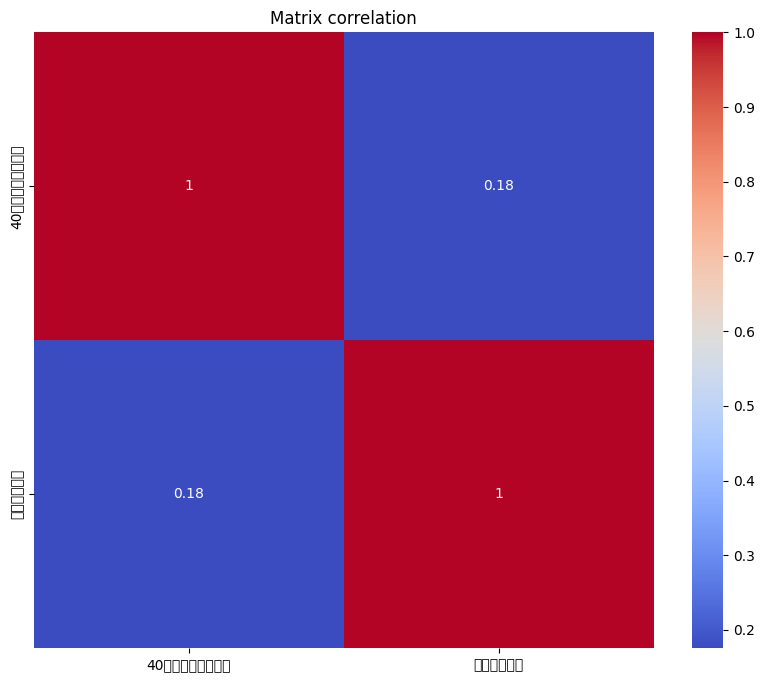

In [50]:
#젠트리피케이션 발생 지역 라벨링 필수
# Matrice correlation
correlation_matrix = result_df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrix correlation")
plt.show()